In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from IPython.display import Image, display,HTML

/kaggle/input/images/Images/check_mudra.jpg
/kaggle/input/images/Images/check3.jpg
/kaggle/input/images/Images/Custom_CNN.jpg
/kaggle/input/images/Images/All_Mudras.jpg
/kaggle/input/images/Images/Json.jpg
/kaggle/input/images/Images/Mudra Finder.jpg
/kaggle/input/images/Images/Custom_Accuracy.jpg
/kaggle/input/images/Images/CNN_Accuracy.jpg
/kaggle/input/images/Images/CNN.jpg
/kaggle/input/images/Images/Streamlit app.jpg
/kaggle/input/images/Images/check2.jpg


<h1>🪷 Bharatanatyam Mudra Recognition & Mapping</h1>
<h4><em>Author: Rajeshwari Rajiv Jadhav</em></h6>
<h4><em>Roll No: 210122045</em></h6>

<hr>

<h2>🧭 1)The Inspiration for this Project</h2>
<p style="font-size:18px;">
Indian classical dance is a powerful form of <strong>multimodal storytelling</strong>, combining expressive movements, rhythmic patterns, facial expressions, recited <strong>shlokas (verses)</strong>, and <strong>mudras (symbolic hand gestures)</strong>. Among the various traditions, Bharatanatyam is one of the most structured and ancient. Each mudra in Bharatanatyam is codified, with meanings often rooted in Sanskrit texts and devotional narratives.
This project explores how modern machine learning techniques can be applied to support the understanding and preservation of this classical tradition. 
</p>
<p style="font-size:18px;">
The application has two core components:
<ul>
  <li style="font-size:18px;"><strong>Mudra Image Classifier </strong>– A convolutional neural network (CNN)-based model that identifies Bharatanatyam mudras from uploaded or captured images.</li>
  <li style="font-size:18px;"><strong>Mudra Mapper</strong> – A search tool that matches Sanskrit words or full shlokas with corresponding mudras, providing their descriptions and reference images.</li>
</ul>
</p>

<hr>
<h2>📈 2)Dataset Overview</h2>

<p style="font-size:18px;">
This project is built upon two primary datasets—one for image classification and another for mapping mudras to their semantic meanings.
</p>

<h3>🖼️ Mudra Image Dataset (for Classification)</h3>

<p style="font-size:18px;">
The mudra images used for training the classifier were sourced from a publicly available dataset on 
<a href="https://www.kaggle.com/datasets/mayamohan2212/bharatnatyam-asamyuta-hasta-mudras" target="_blank">Kaggle</a>. The dataset consists of labeled images of various <strong>Bharatanatyam mudras</strong>, 
each representing a unique hand gesture from the classical repertoire.
</p>

<p style="font-size:18px;">
Due to the large size of the original dataset and computational limitations, a subset of the images was selected for training. 
</p>
<p style="font-size:18px;">
The final processed dataset used for model training includes:
</p>
<ul>
  <li style="font-size:18px;"><strong>28 mudra classes</strong> in total</li>
  <li style="font-size:18px;"><strong>Training set</strong>: 350 images per mudra (9,800 images total)</li>
  <li style="font-size:18px;"><strong>Validation set</strong>: 100 images per mudra (2,800 images total)</li>
  <li style="font-size:18px;"><strong>Test set</strong>: 100 images per mudra (2,800 images total)</li>
</ul>

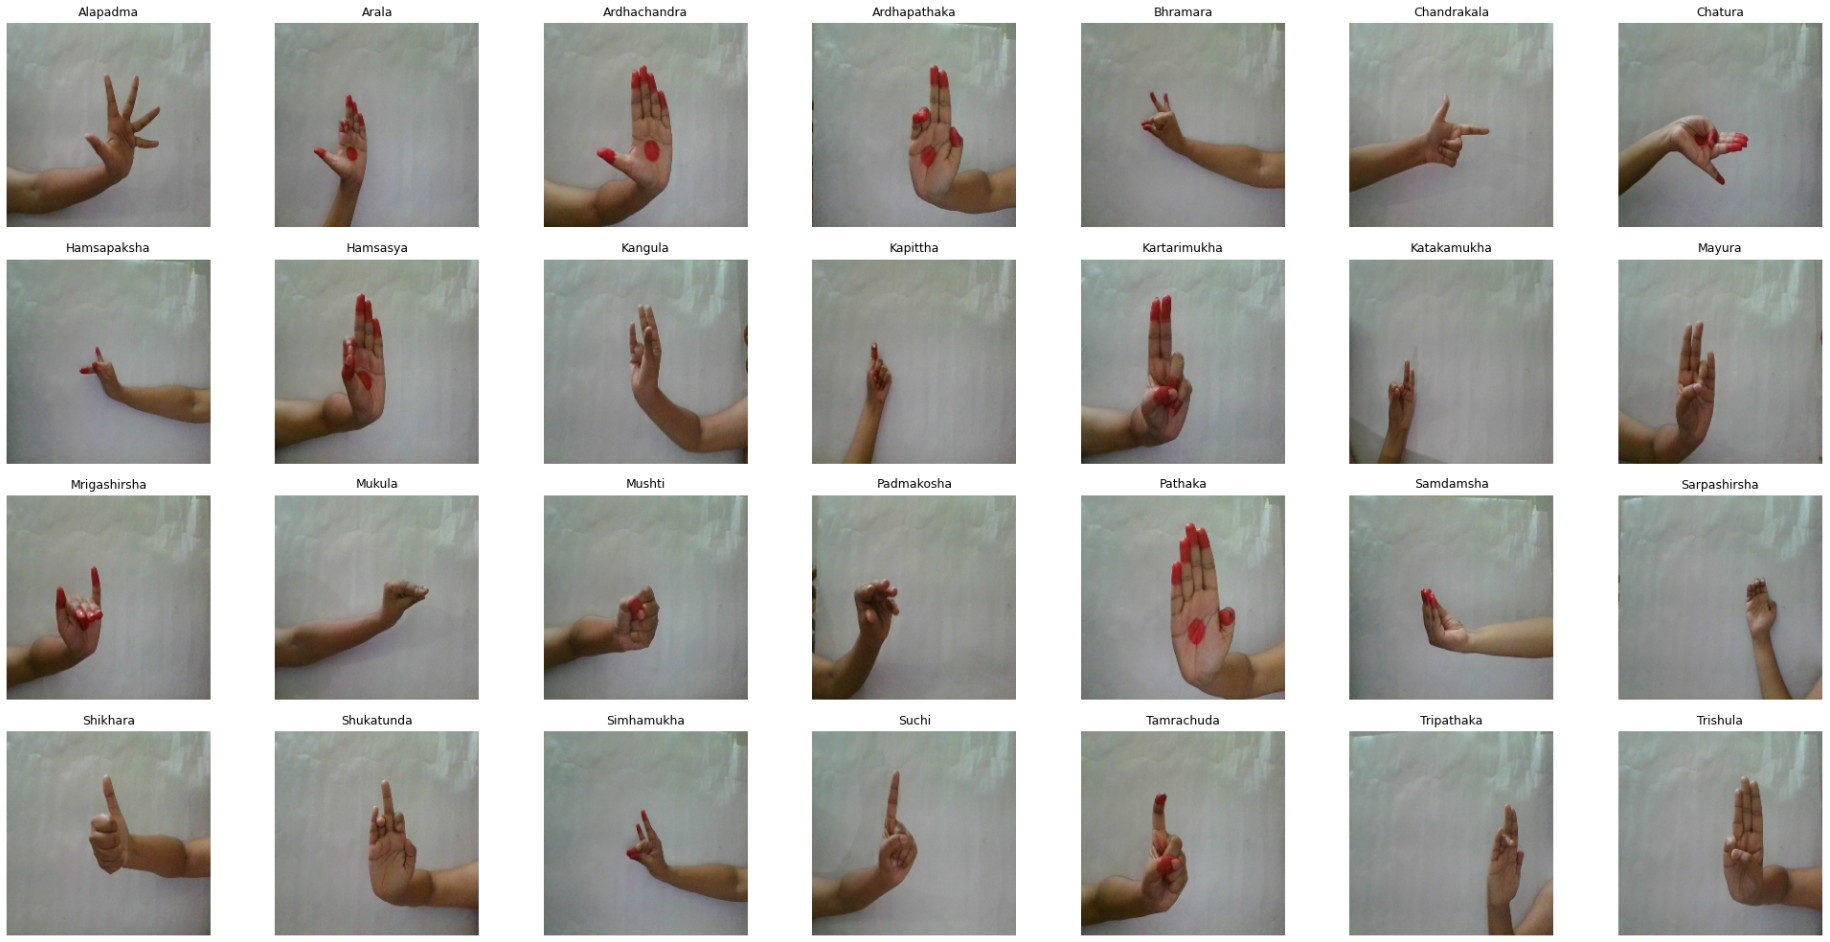

In [33]:
display(Image(filename='/kaggle/input/images/Images/All_Mudras.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 1: The 28 Asamyukta Hasta Mudras in the dataset</em></div>"))

<h3>🔠 Mudra Semantic Mapping Dataset (for Mudra Mapper)</h3>

<p style="font-size:18px;">
For the second part of the project—the semantic search tool—a <strong>custom JSON dataset</strong> was created. This dataset maps each mudra to:
</p>

<ul>
  <li style="font-size:18px;">Its Sanskrit name</li>
  <li style="font-size:18px;">Meaning and common usage context in English</li>
</ul>

<p style="font-size:18px;">
This mapping was carefully curated from classical dance literature available from online resources. The structured JSON format enables fast and meaningful retrieval of mudras when a user searches by Sanskrit words or inputs shlokas.
</p>

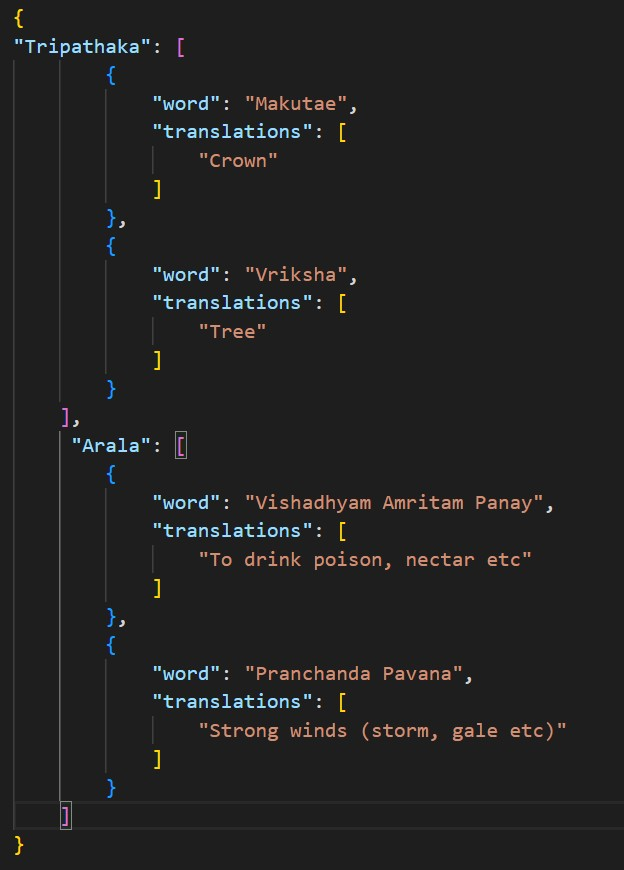

In [21]:
display(Image(filename='/kaggle/input/images/Images/Json.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 2: Sample from the Json dataset</em></div>"))

<h2>🧠 3)CNN Architectures & Transfer Learning</h2>

<h3>1️⃣ Custom CNN Model</h3>

<p style="font-size:18px;">
The first model is a lightweight CNN composed of three convolutional blocks followed by fully connected layers. It was trained from scratch on the mudra dataset. This model was effective in capturing visual features of hand gestures using relatively few parameters.The model's architecture includes convolutional layers with ReLU activation, max-pooling for downsampling, and dropout to reduce overfitting.
</p>

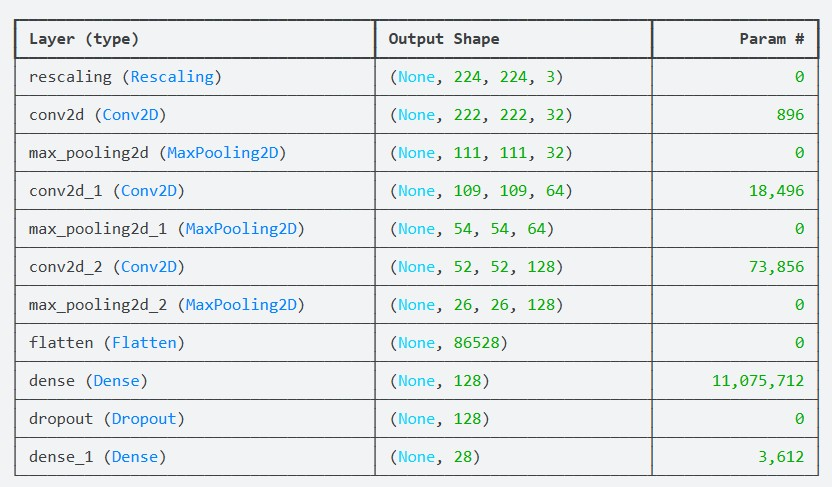

In [22]:
display(Image(filename='/kaggle/input/images/Images/Custom_CNN.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 3: Custom CNN Architecture</em></div>"))

<h3>2️⃣ Transfer Learning with MobileNetV2</h3>

<p style="font-size:18px;">
To improve performance and leverage prior learning, the second approach used <strong>transfer learning</strong> via the <strong>MobileNetV2</strong> architecture, 
a lightweight CNN pre-trained on the ImageNet dataset. The base layers of MobileNetV2 were frozen, and a few custom classification layers were added on top 
to adapt the model to the 28 mudra classes.
</p>
<p style="font-size:18px;">This approach significantly reduced training time and improved generalization, especially for subtle variations in hand gestures.</p>

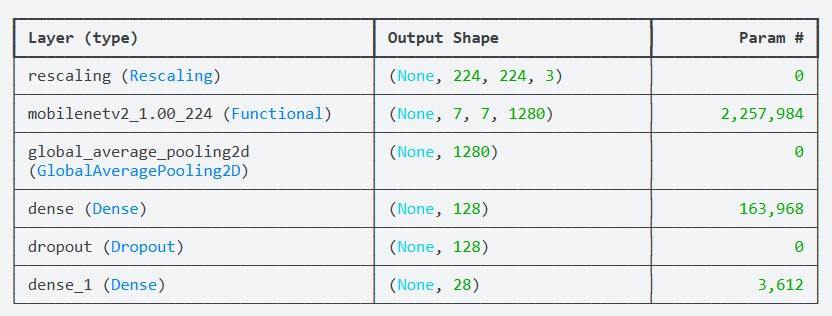

In [23]:
display(Image(filename='/kaggle/input/images/Images/CNN.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 4: MobileNetV2 CNN Architecture</em></div>"))

<h2>📊 4)Accuracy & Loss Comparison</h2>

<p style="font-size:18px;">
The training and validation accuracy/loss curves of both models were tracked to compare learning behavior and performance. 
</p>


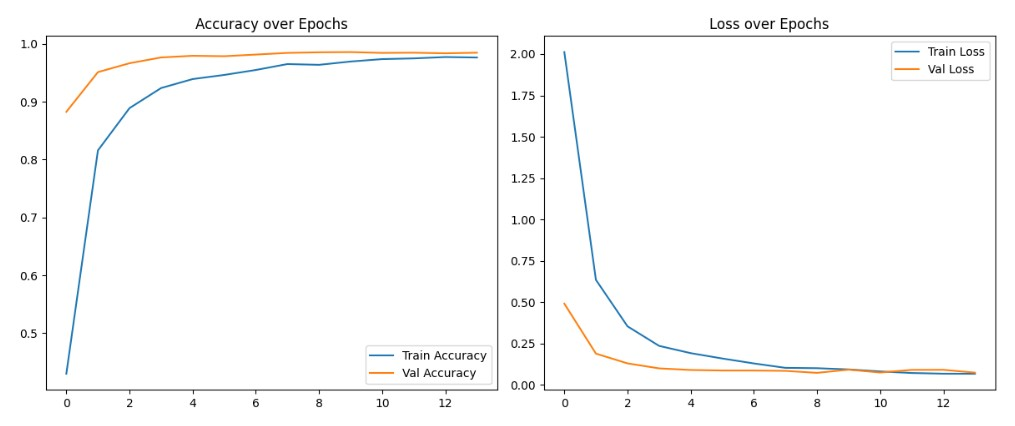

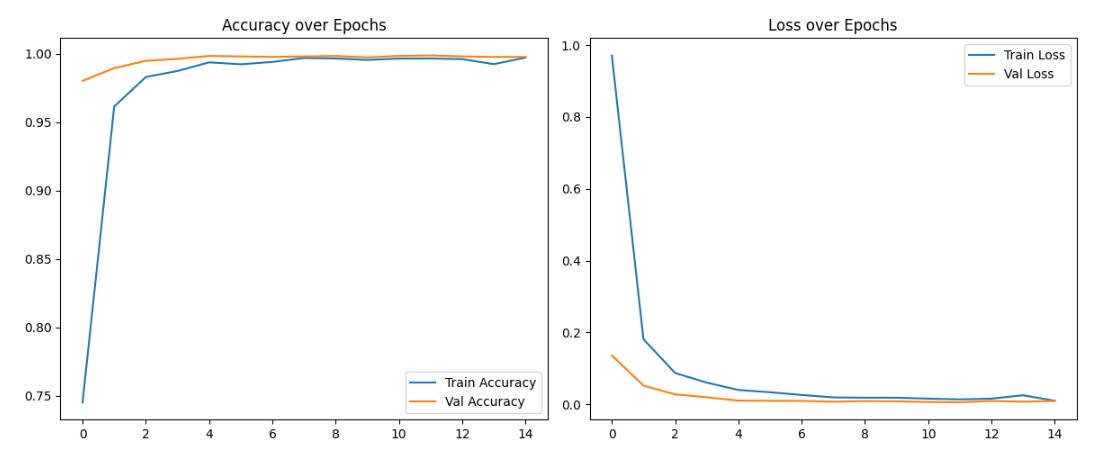

In [24]:
display(Image(filename='/kaggle/input/images/Images/Custom_Accuracy.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 5: Accuracy and Loss Plots for Custom CNN Model</em></div>"))
display(Image(filename='/kaggle/input/images/Images/CNN_Accuracy.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 6: Accuracy and Loss Plots for MobileNetV2 CNN Model</em></div>"))

<h3>✅ Test Accuracy</h3>

<p style="font-size:18px;">
After training, both models were evaluated on the test set consisting of 100 images per mudra class. The MobileNetV2-based model 
achieved significantly higher accuracy on unseen data, demonstrating the effectiveness of transfer learning in this task.
</p>
<p style="font-size:18px;">
Test Accuracy of:
<ul>
    <li style="font-size:18px;">Custom CNN Model : 0.9875</li>
    <li style="font-size:18px;">MobileNetV2 Model : 0.9975</li>
</ul>
</p>
<hr>
<h2>🔎 5)Mudra Mapper using <code>ipywidgets</code></h2>

<p style="font-size:18px;">
To complement visual mudra classification, an interactive tool was built using <code>ipywidgets</code> to map Sanskrit words or shlokas to relevant mudras. This enables users to search semantically and explore mudras based on meaning or context.
</p>

In [ ]:
def run_query(query):
    with output:
        clear_output()
        results = find_mudras_by_query(query)
        if results:
            display(widgets.HTML(f"<h4>🔍 Results for: <i>{query}</i></h4>"))
            for res in results:
                display(widgets.HTML(
                    f"<b>👉 Mudra:</b> {res['mudra']}<br>"
                    f"<b>Word:</b> {res['word']}<br>"
                    f"<b>Meanings:</b> {', '.join(res['translations'])}<br><br>"
                ))
        else:
            display(widgets.HTML(
                f"<span style='color:red;'>❌ No mudras found for: <i>{query}</i></span>"
            ))

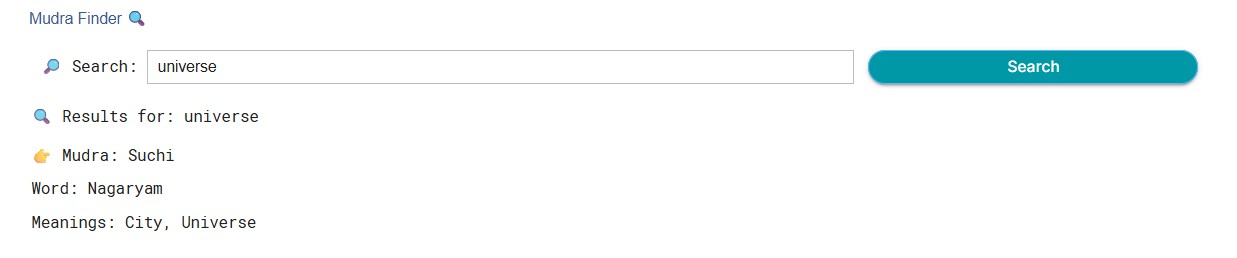

In [26]:
display(Image(filename='/kaggle/input/images/Images/Mudra Finder.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 7: Mudra Finder for Words</em></div>"))

In [ ]:
def get_mudras_for_shloka(shloka_text):
    words = re.findall(r'\b\w+\b', shloka_text.lower())
    matched_mudras = {}

    for word in words:
        for mudra, entries in mudra_dict.items():
            for entry in entries:
                if word in entry["word"].lower() or any(word in t.lower() for t in entry["translations"]):
                    if mudra not in matched_mudras:
                        matched_mudras[mudra] = []
                    matched_mudras[mudra].append({
                        "word": entry["word"],
                        "translation": entry["translations"]
                    })

    with output:
        clear_output()
        if matched_mudras:
            print("🪷 Mudras matching this shloka/concept:\n")
            for mudra, matches in matched_mudras.items():
                print(f"🖐️ Mudra: {mudra}")
                for m in matches:
                    print(f"   ↳ Word: {m['word']}, Meanings: {', '.join(m['translation'])}")
                print()
        else:
            print("❌ No mudras found for this shloka.")

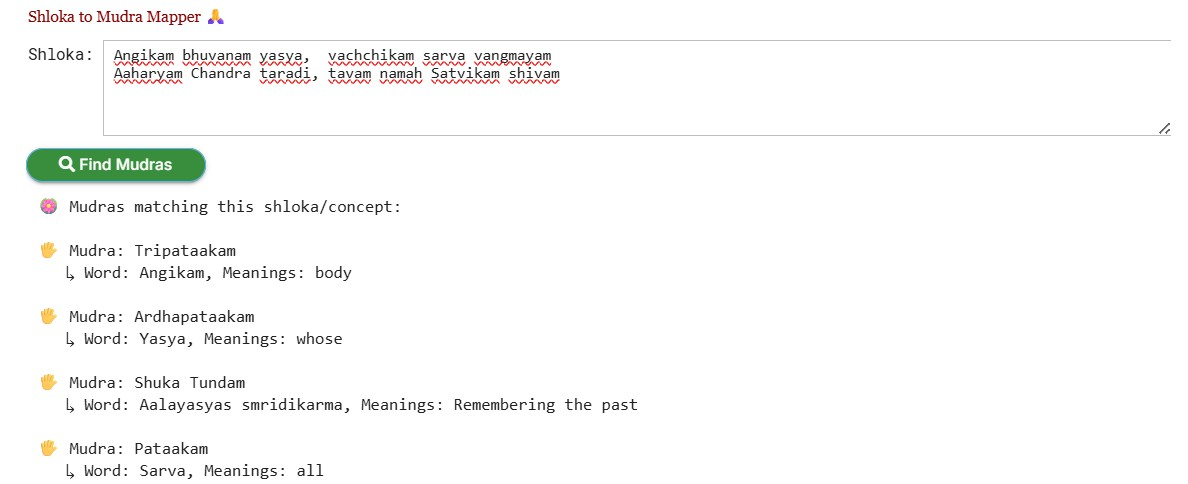

In [27]:
display(Image(filename='/kaggle/input/images/Images/Shloka.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 8: Mudra Finder for Shlokhas</em></div>"))

<h2>🚀 6)Deploying with Streamlit</h2>

<p style="font-size:18px;">
To make the mudra classification and semantic mapping accessible beyond the notebook environment, a web application was developed using <strong>Streamlit</strong>. This app integrates both the trained CNN model for image-based mudra classification and the mapping tool for semantic search based on Sanskrit words or shlokas.
</p>

<h3>🧠 Features of the Streamlit App</h3>

<ul>
  <li style="font-size:18px;"><strong>📷 Mudra Classifier:</strong> Users can upload an image, and the model predicts the mudra using the trained CNN (custom or MobileNetV2).</li>
  <li style="font-size:18px;"><strong>🔤 Semantic Search:</strong> Users can input a word or a full Sanskrit shloka to find corresponding mudras, and obtain the relevant mudra and it's image.</li>
</ul>

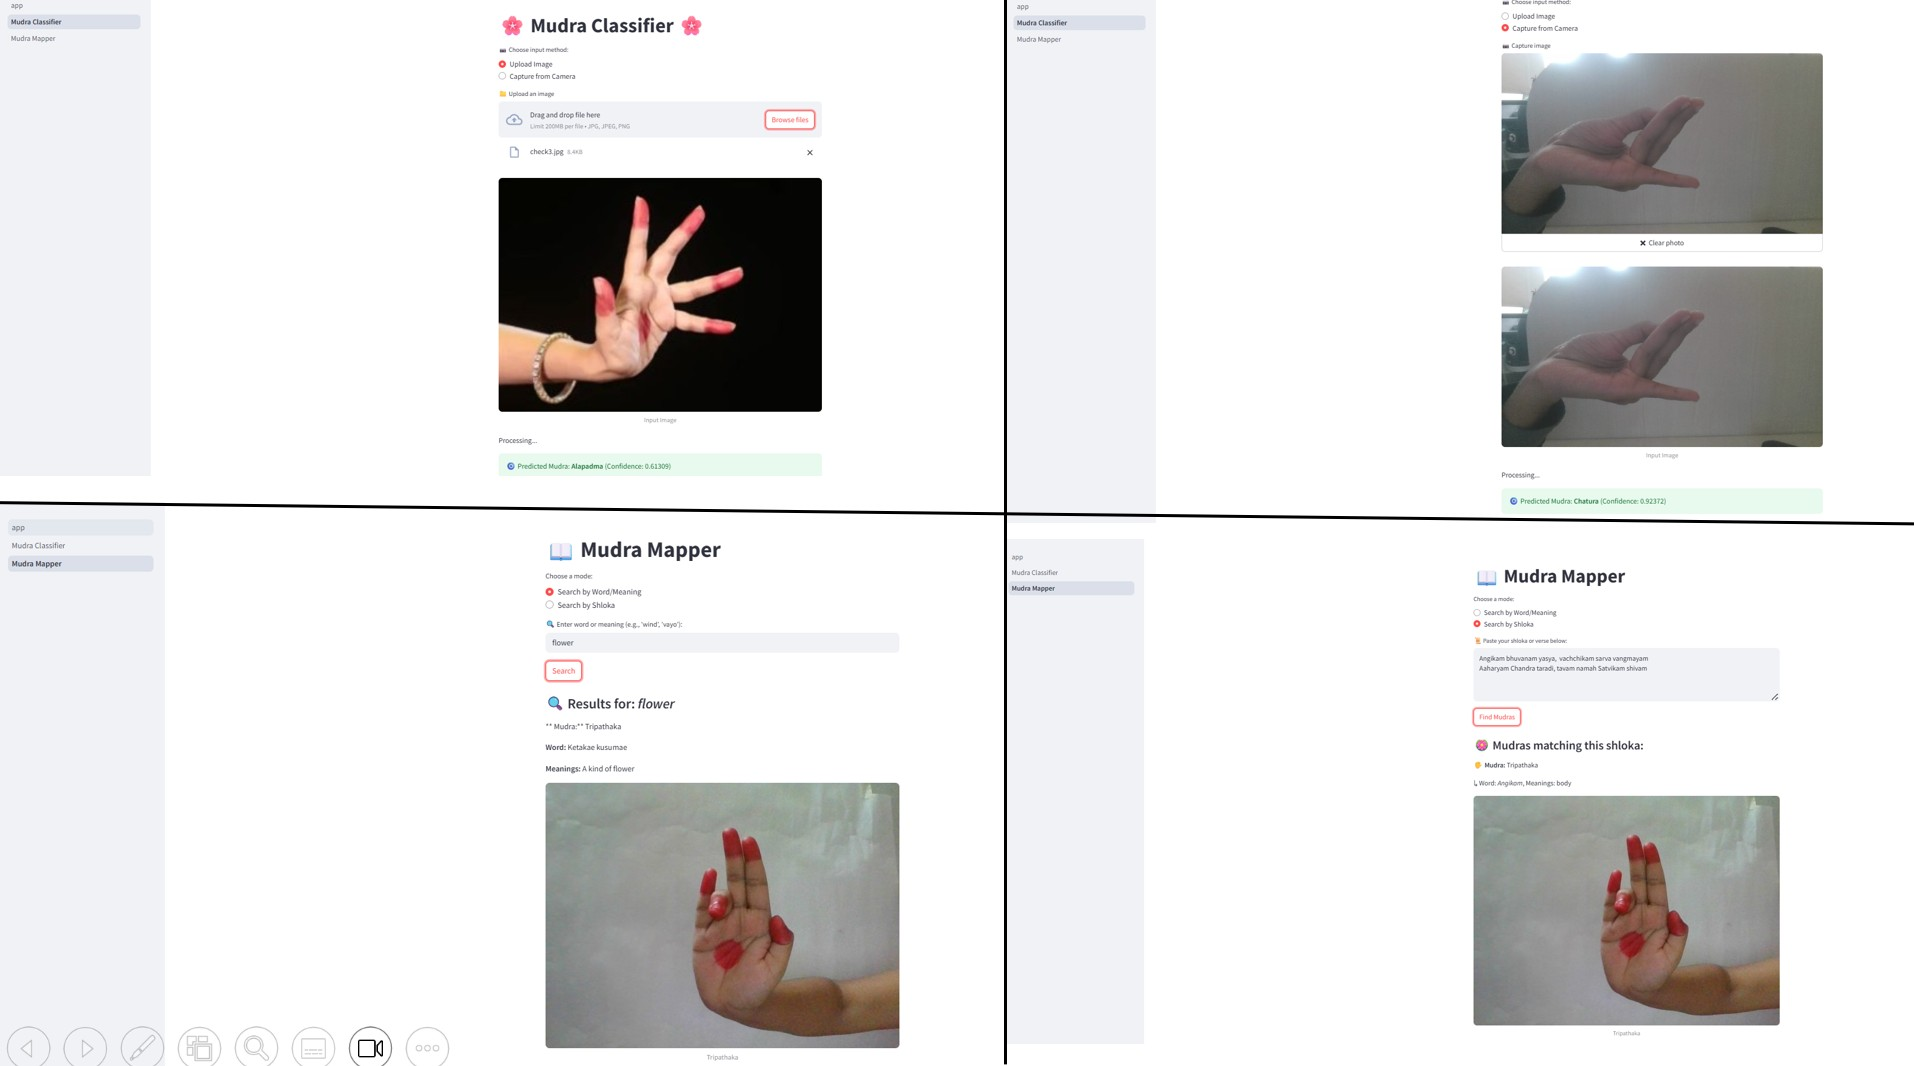

In [28]:
display(Image(filename='/kaggle/input/images/Images/Streamlit app.jpg'))
display(HTML("<div style='text-align:center;'><br><em>Fig. 9: Streamlit Webpage</em></div>"))

<h2>🔗 7)Relevance to Recent Work in Multimodal Learning</h2>

<p style="font-size:18px;">
Bharatanatyam is an inherently <strong>multimodal performance art</strong>, combining physical expression (mudras and body movements), auditory elements (music, rhythm, and spoken shlokas), and emotional cues (facial expressions) to convey layered narratives and emotions. This interplay of modalities to communicate meaning aligns closely with the aims of modern <strong>multimodal learning</strong> in artificial intelligence.
</p>

<p style="font-size:18px;">
In today's AI landscape, multimodal learning has become a major research frontier. Models like <strong>CLIP</strong> (Contrastive Language-Image Pre-training by OpenAI), <strong>Flamingo</strong> (DeepMind), <strong>VisualBERT</strong>, and <strong>GPT-4 with vision</strong> are designed to process and jointly reason over different modalities—particularly text and images. These models demonstrate how integrating visual and linguistic understanding leads to more robust, generalizable AI systems, capable of tasks like zero-shot classification, visual question answering, and cross-modal retrieval.
</p>

<p style="font-size:18px;">
This project reflects a similar philosophy by combining <strong>computer vision</strong> (for classifying hand gestures) with <strong>semantic retrieval</strong> (mapping Sanskrit words or shlokas to mudras). It highlights how even domain-specific cultural tasks can benefit from the design patterns emerging in multimodal AI research. Moreover, the interactive tool showcases how such integrations can empower users—especially in education, heritage preservation, or digital humanities—by enabling intuitive, cross-modal exploration of traditional knowledge.
</p>


<h2>✅ 8)Conclusion</h2>

<h3>📘 Learnings</h3>
<p style="font-size:18px;">
This project offered a valuable opportunity to apply machine learning techniques to a culturally rich domain. Through the development of a mudra classifier and a semantic search tool, I gained hands-on experience with convolutional neural networks (CNNs), transfer learning using MobileNetV2, and interactive Python interfaces using ipywidgets. It also deepened my understanding of how multimodal representations—such as gesture and language—can be digitally interpreted and linked through meaningful computation.
</p>

<h3>🔍 Reflections</h3>
<p style="font-size:18px;">
<b>What surprised me?</b><br>
The clarity with which the pretrained MobileNetV2 model outperformed the custom CNN—despite fewer epochs and simpler training—was striking. Also, seeing abstract cultural data like shlokas and gestures come together in an interactive application highlighted the potential of AI in preserving and enhancing access to traditional art forms.
</p>

<p style="font-size:18px;">
<b>Scope for Improvement:</b>
<ul>
  <li style="font-size:18px;">Extend the Mudra Mapper to support multilingual input, possibly incorporating speech-to-text for vocal shloka queries.</li>
  <li style="font-size:18px;">Fine-tune the pretrained model further or experiment with larger, more diverse datasets for increased generalization.</li>
  <li style="font-size:18px;">Incorporate facial expressions and audio components for more holistic rasa (emotion) recognition.</li>
  <li style="font-size:18px;">Enhance the Sanskrit-to-meaning dictionary with a more comprehensive and linguistically enriched dataset. This would allow the Mudra Mapper to recognize a broader and more diverse range of Sanskrit words and their semantic equivalents, improving the accuracy and cultural relevance of the mapping.</li>
</ul>
</p>

<h3>📚 9)References</h3>
<ul>
  <li style="font-size:18px;"><a href="https://www.kaggle.com/datasets/mayamohan2212/bharatnatyam-asamyuta-hasta-mudras" target="_blank">Kaggle Dataset:Asamyuta Hasta Mudras</a></li>
  <li style="font-size:18px;"><a href="https://www.naatyaanjali.com/asamyuta-hastas/" target="_blank">Mudras with meanings</a></li>
  <li style="font-size:18px;"><a href=" https://realprimalconnection.blogspot.com/2014/01/bharatanatyam-shlokas.html" target="_blank">Shlokas</a></li>
  <li style="font-size:18px;"><a href=" Documentation</li>https://docs.streamlit.io/" target="_blank">Streamlit </a></li>
</ul>
